# Graphs in Python using NetworkX

"A picture speaks a thousand words" is one of the most commonly used phrases. But a graph speaks so much more than that. A visual representation of data, in the form of graphs, helps us gain actionable insights and make better decisions based on them.

Let us look at a simple graph to understand the concept.

<img src='files/img/simple.png'>

Consider that this graph represents the places in a city that people generally visit, and the path that was followed by a visitor of that city. Let us consider V as the places and E as the path to travel from one place to another.

$$V = \{v_1, v_2, v_3, v_4, v_5\}$$
$$E = \{(v_1, v_2), (v_2, v_5), (v_5, v_5), (v_4, v_5), (v_4, v_4)\}$$

The edge $(u, v)$ is the same as the edge $(v, u)$ - They are unordered pairs.

Concretely - __Graphs are mathematical structures used to study pairwise relationships between objects and entities.__ It is a branch of Discrete Mathematics and has found multiple applications in Computer Science, Chemistry, Linguistics, Operations Research, Sociology, etc.

Formally,
-  A __Graph__ is a pair of sets. $G = (V, E)$. $V$ is the set of vertices. $E$ is a set of edges. $E$ is made up of pairs of elements from $V$ (unordered pair)
-  A __Directed Graph__ is also a pair of sets. $D = (V, A)$. $V$ is the set of vertices. $A$ is the set of arcs. $A$ is made up of pairs of elements from $V$ (ordered pair)

In the case of directed graphs, there is a distinction between $(u, v)$ and $(v, u)$. Usually the edges are called arcs in such cases to indicate a notion of direction.

There are packages that exist in R and Python to analyze data using Graphs. In this article we will be using Networkx Python package.

<img src='files/img/network.png'>

<img src='files/img/usecase.png'>

From the above examples it is clear that the applications of Graphs are numerous and vast. Let us look at a few use cases:
-  __Marketing Analytics__ - Graphs can be used to figure out the most influential people in a Social Network. Advertisers and Marketers can estimate the biggest bang for the marketing buck by routing their message through the most influential people in a Social Network.
-  __Banking Transactions__ - Graphs can be used to find unusual patterns helping in mitigating Fraudulent transactions. There have been examples where Terrorist activity has been detected by analyzing the flow of money across interconnected Banking networks.
-  __Supply Chain__ - Graphs help in identifying optimum routes for your delivery trucks and in identifying locations for warehouses and delivery centres.
-  __Pharma__ - Pharma companies can optimize the routes of the salesman using Graph theory. This helps in cutting costs and reducing the travel time for salesman.
-  __Telecom__ - Telecom companies typically use Graphs (Voronoi diagrams) to understand the quantity and location of Cell towers to ensure maximum coverage.

## Getting Familiar with Graphs in Python

We will be using the `networkx` package in Python. It can be installed in the root environment of Anaconda (if you are using the Anaconda distribution of Python). You can also `pip install` it.

Let us look at some common things that can be done with the NetworkX package. These include importing and creating a Graph and ways to visualize it.

### Creating a graph

Create an empty graph with no nodes and no edges.

In [1]:
import networkx as nx

# Creating a Graph
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. (Note: Python's None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

### Nodes

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we'll look at simple manipulations. You can add one node at a time,

In [2]:
G.add_node(1)

add a list of nodes,

In [3]:
G.add_nodes_from([2, 3])

or add any _nbunch_ of nodes. An _nbunch_ is any iterable container of nodes that is not itself a node in the graph. (e.g. a list, set, graph, file, etc...)

In [4]:
H = nx.path_graph(10)
G.add_nodes_from(H)

Note that G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.

In [5]:
G.add_node(H)

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in G and have a separate dictionary keyed by identifier to the node information if you prefer. (Note: You should not change the node object if the hash depends on its contents.)

### Edges

G can also be grown by adding one edge at a time,

In [6]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple*

by adding a list of edges,

In [7]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any _ebunch_ of edges. An _ebunch_ is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. (2, 3, {'weight': 3,1415}). Edge attributes are discussed further below.

In [8]:
G.add_edges_from(H.edges())

One can demolish the graph in a similar fashion; using `Graph.remove_node()`, `Graph.remove_nodes_from()`, `Graph.remove_edge()` and `Graph.remove_edges_from()`, e.g.

In [9]:
G.remove_node(H)

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,

In [10]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present.

In [11]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

At this stage the graph G consists of 8 nodes and 2 edges, as can be seen by:

In [12]:
G.number_of_nodes()

8

In [13]:
G.number_of_edges()

2

We can examine them with

In [14]:
list(G.nodes())

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [15]:
list(G.edges())

[(1, 2), (1, 3)]

In [16]:
list(G.neighbors(1))

[2, 3]

Removing nodes or edges has similar syntax to adding:

In [17]:
G.remove_nodes_from("spam")
list(G.nodes())

[1, 2, 3, 'spam']

In [18]:
G.remove_edge(1, 3)

When creating a graph structure by instantiating one of the graph classes you can specify data in several formats.

In [19]:
H = nx.DiGraph(G)    # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [20]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

### What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1, n2, object=x).

As an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML record of publications detailing experimental observations of their interaction.

We have found this power quite useful, but its abuse can lead to unexpected surprises unless one is familiar with Python. If in doubt, consider using `convert_node_labels_to_integers()` to obtain a more traditional graph with integer labels.

### Accessing edges

In addition to the methods `Graph.nodes()`, `Graph.edges()`, and `Graph.neighbors()`, iterator versions (e.g. `Graph.edges_iter()`) can save you from creating large lists when you are just going to iterate through them anyway.

Fast direct access to the graph data structure is also possible using subscript notation.

In [21]:
G[1] # Warning: do not change the resulting dict

AtlasView({2: {}})

In [22]:
G[1][2]

{}

You can safely set the attributes of an edge using subscript notation if the edge already exists.

In [23]:
G.add_edge(1, 3)
G[1][3]['color'] = 'blue'

Fast examination of all edges is achieved using adjacency iterators. Note that for undirected graphs this actually looks at each edge twice.

In [24]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

for n, nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5:
            print('({0}, {1}, {2})'.format(n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges method.

In [25]:
for (u, v, d) in FG.edges(data = 'weight'):
    if d < 0.5:
        print('({0}, {1}, {2})'.format(u, v, d))

(1, 2, 0.125)
(3, 4, 0.375)


### Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.node and G.edge for a graph G.

### Graph attributes

Assign graph attributes when creating a new graph

In [26]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [27]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using add_node(), add_nodes_from() or G.node

In [28]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[1]

{'time': '5pm'}

In [29]:
G.node[1]['room'] = 714
G.nodes(data=True)

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Note that adding a node to G.node does not add it to the graph, use G.add_node() to add new nodes.

### Edge Attributes

Add edge attributes using add_edge(), add_edges_from(), subscript notation or G.edge.

In [30]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[(1, 2)]['weight'] = 4

The special attribute 'weight' should be numeric and holds values used by algorithms requiring weighted edges.

### Directed graphs

The `DiGraph` class provides additional methods specific to directed edges, e.g. `DiGraph.out_edges()`, `DiGraph.in_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()`, etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() and degree() are equivalent to successors() and the sum of in_degree() and out_degree() respectively even though that may feel inconsistent at times.

In [31]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [32]:
DG.degree(1, weight='weight')

1.25

In [33]:
list(DG.successors(1))

[2]

In [34]:
list(DG.neighbors(1))

[2]

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using `Graph.to_undirected()` or with

In [35]:
H = nx.Graph(G) # convert G to undirected graph

### Multigraphs

NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The `MultiGraph` and `MultiDiGraph` classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Shortest path is one example. Where results are well defined, e.g. `MultiGraph.degree()` we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [36]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
MG.degree(weight='weight')

MultiDegreeView({1: 1.25, 2: 1.75, 3: 0.5})

In [37]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min(d['weight'] for d in edict.values())
        GG.add_edge(n, nbr, weight = minvalue)
        
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

### Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by

-  Applying classic graph operations, such as:

In [38]:
# subgraph(G, nbunch)         - induce subgraph of G on nodes in nbunch
# union(G1, G2)               - graph union
# disjoint_union(G1, G2)      - graph union assuming all nodes are different
# cartesian_product(G1, G2)   - return Cartesian product graph
# compose(G1, G2)             - combine graphs identifying nodes common to both
# complement(G)               - graph complement
# create_empty_copy(G)        - return an empty copy of the same graph class
# convert_to_undirected(G)    - return an undirected representation of G
# convert_to_directed(G)      - return a directed representation of G

-  Using a call to one of the classic small graphs, e.g.

In [39]:
petersen = nx.petersen_graph()
tutte    = nx.tutte_graph()
maze     = nx.sedgewick_maze_graph()
tet      = nx.tetrahedral_graph()

-  Using a (constructive) generator for a classic graph, e.g.

In [40]:
K_5      = nx.complete_graph(5)
K_3_5    = nx.complete_bipartite_graph(3, 5)
barbell  = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

-  Using a stochastic graph generator, e.g.

In [41]:
er  = nx.erdos_renyi_graph(100, 0.15)
ws  = nx.watts_strogatz_graph(30, 3, 0.1)
ba  = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

-  Reading a graph stored in a file using common graph formats, such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [42]:
nx.write_gml(red, "data/testgraph")
mygraph = nx.read_gml("data/testgraph")

Details on graph formats: [Reading and writing graphs](https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html)

Details on graph generator functions: [Graph generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html)

### Analyzing graphs

The structure of G can be analyzed using various graph-theoretic functions such as:

In [43]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")    # adds node "spam"

In [44]:
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [45]:
sorted(dict(nx.degree(G)).values())

[0, 1, 1, 2]

In [46]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

Functions that return node properties return dictionaries keyed by node label.

In [47]:
nx.degree(G)

DegreeView({1: 2, 2: 1, 3: 1, 'spam': 0})

For values of specific nodes, you can provide a single node or an nbunch of nodes as argument. If a single node is specified, then a single value is returned. If an nbunch is specified, then the function will return a dictionary.

In [48]:
nx.degree(G, 1)

2

In [49]:
G.degree(1)

2

In [50]:
G.degree([1, 2])

DegreeView({1: 2, 2: 1})

In [51]:
sorted(dict(G.degree([1, 2])).values())

[1, 2]

In [52]:
sorted(dict(G.degree()).values())

[0, 1, 1, 2]

Details on graph algorithms supported: [Algorithms](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html)

### Graph Visualization

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing package and will be imported if possible. See [Drawing](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html) for details.

First import Matplotlib's plot interface (pylab works too)

In [53]:
import matplotlib.pyplot as plt

To test if the import of networkx.drawing was successful,

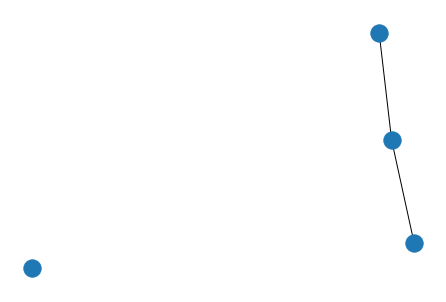

In [54]:
nx.draw(G)

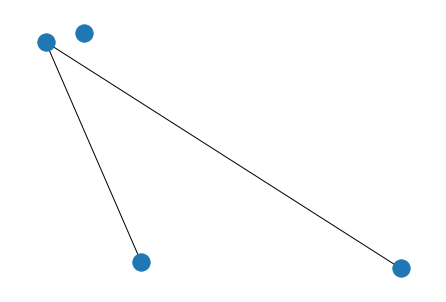

In [55]:
nx.draw_random(G)

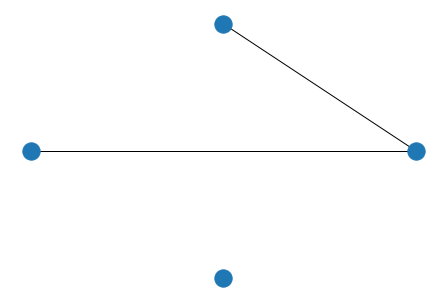

In [56]:
nx.draw_circular(G)

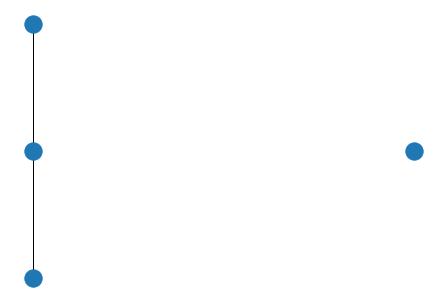

In [57]:
nx.draw_spectral(G)

To save drawings to a file, use, for example

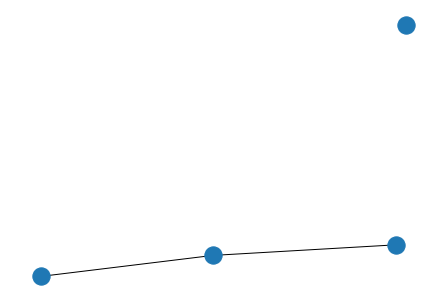

In [58]:
nx.draw(G)
plt.savefig("img/testgraph.png")

writes to the file "img/testgraph.png" in the local directory. If Graphviz and PyGraphviz, or pydot, are available on your system, you can also use

In [59]:
import networkx.drawing.nx_pydot as pdt

pdt.write_dot(G, 'data/testgraph.dot')

NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. Graph visualization is hard and we will have to use specific tools dedicated for this task. `Matplotlib` offers some convenience functions. But `GraphViz` is probably the best tool for us as it offers a Python interface in the form of `PyDot`.

You will first have to install Graphviz and PyDot using `pip install graphviz` and `pip install pydot`. Then in order to render the DOT source code, you will also need to install [Graphviz](https://www.graphviz.org/download/).

Make sure the directory containing the `dot` executable is on your systems' path.

In [60]:
import networkx.drawing.nx_pydot as pdt

d = {'1': {'2': None},
     '2': {'1': None,
           '3': None},
     '3': {'1': None}}

G = nx.Graph(d)
A = pdt.to_pydot(G)
print(A)

strict graph  {
1;
2;
3;
1 -- 2;
1 -- 3;
2 -- 3;
}



PyDot provides great control over the individual attributes of the edges and nodes. We can get very beautiful visualizations using it.

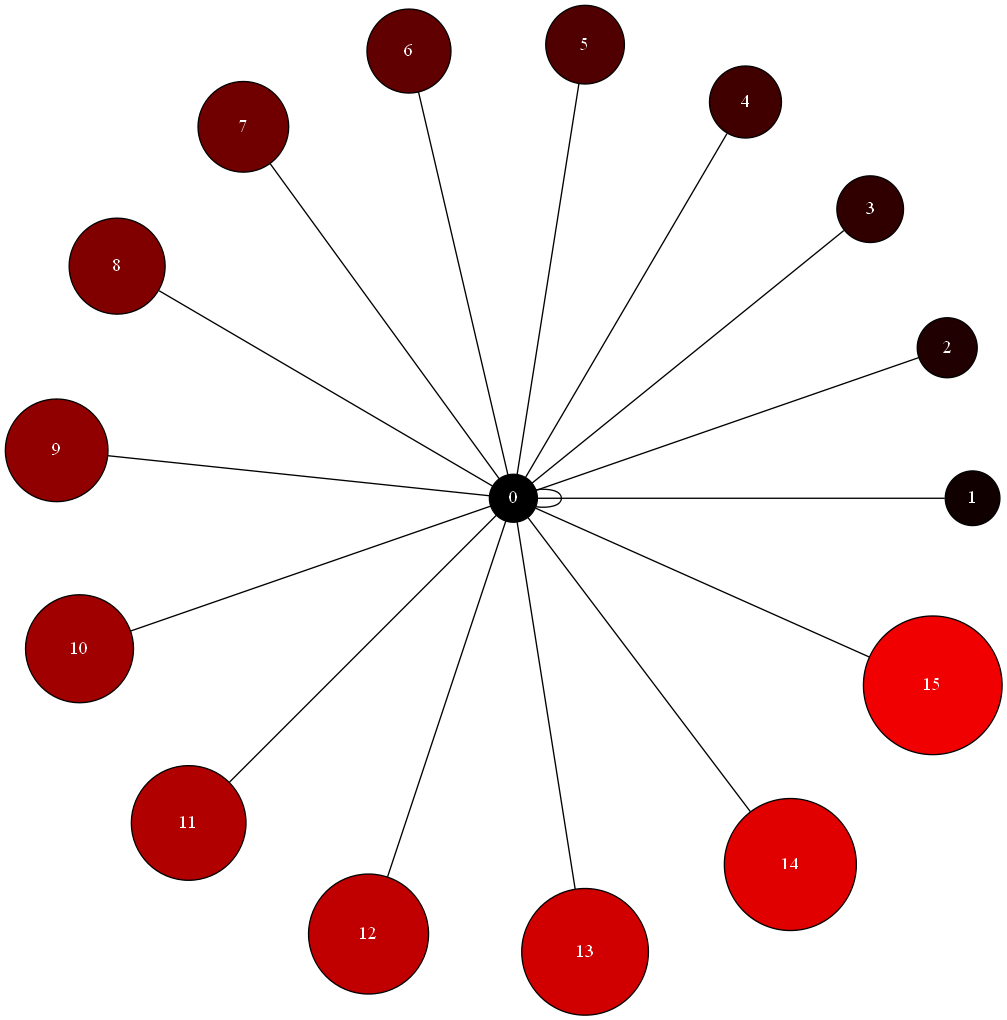

In [61]:
from IPython.display import Image
import pydot

B = pydot.Dot(graph_type='graph')
B.set_node_defaults(style='filled', shape='circle', fixedsize='true', fontcolor='#FFFFFF')

for i in range(16):
    node = pydot.Node(
            i, 
            fillcolor='#%2x0000'%(i*16),
            height=i/16.0+0.5,
            width=i/16.0+0.5
           )
    B.add_node(node)
    B.add_edge(pydot.Edge(0, node))

B.write_png('img/star.png', prog='circo')
Image('img/star.png', width=650)

Usually, visualization is thought of as a separate task from Graph analysis. A graph once analyzed is exported as a Dotfile. This Dotfile is then visualized separately to illustrate a specific point we are trying to make.